In [1]:
import numpy as np
import numpy.random as npr
from IPython.display import Latex

In [2]:
npr.seed(10)

sites = np.ones(12)*1/2*np.sign(npr.random(12)-0.5)
links = np.ones(12)*1/2*np.sign(npr.random(12)-0.5)
print(sites)
print(links)

[ 0.5 -0.5  0.5  0.5 -0.5 -0.5 -0.5  0.5 -0.5 -0.5  0.5  0.5]
[-0.5  0.5  0.5  0.5  0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5  0.5]


In [3]:
leg_sites = {
    1/2 : '$\circ$',
    -1/2 : '$\\bullet$'
}

leg_links = {
    1/2 : '$\leftarrow$',
    -1/2 : '$\\rightarrow$'
}

def Visualize(sites, links):
    sites_symbols = np.vectorize(leg_sites.get)(sites)
    links_symbols = np.vectorize(leg_links.get)(links)
    seq_list = [i + j for i, j in zip(sites_symbols, links_symbols)]
    total_list = ''.join(seq_list)
    return total_list

def Gaggiublock(i, sites, links):
    s1, l1 = sites[i],links[i]
    s2, l2 = sites[i+1],links[i+1]
    g = s2 - l2 + l1 + (-1)**(i)*1/2 == 0     
    '''
    Since numering start from 0 instead of 1 like in the review, 
    we absorbe a '-1' sign (exponent of last term becomes i instead of i+1)
    '''
    return g

In [4]:
sigma1 = (-1/2,-1/2)
sigma2 = (1/2,1/2)

sites = sigma1[0], sigma2[0]
links = sigma1[1], sigma2[1]
    
print(sites, links)
    
Gaggiublock(0,sites,links)

(-0.5, 0.5) (-0.5, 0.5)


True

In [5]:
from itertools import permutations, product

all_sit = list(product([0.5,-0.5], repeat=12))
all_lin = list(product([0.5,-0.5], repeat=12))
ok = []

for s in all_sit:
    for l in all_lin:
        check = True
        for i in range(len(s)-1):
            if not Gaggiublock(i, s, l): 
                check = False
                break
        if check == True: ok.append((s,l))
        
            
        

In [14]:
n = 10
x = Visualize(ok[n][0],ok[n][1]) 
Latex(x)

<IPython.core.display.Latex object>

In [15]:
print(len(ok))


754


'$\\circ$$\\rightarrow$$\\circ$$\\leftarrow$$\\circ$$\\leftarrow$$\\bullet$$\\leftarrow$$\\circ$$\\leftarrow$$\\bullet$$\\leftarrow$$\\bullet$$\\rightarrow$$\\circ$$\\leftarrow$$\\circ$$\\leftarrow$$\\bullet$$\\leftarrow$$\\bullet$$\\rightarrow$$\\bullet$$\\rightarrow$'

In [18]:
ok[n]

((0.5, 0.5, 0.5, -0.5, 0.5, -0.5, -0.5, 0.5, 0.5, -0.5, -0.5, -0.5),
 (-0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -0.5, 0.5, 0.5, 0.5, -0.5, -0.5))

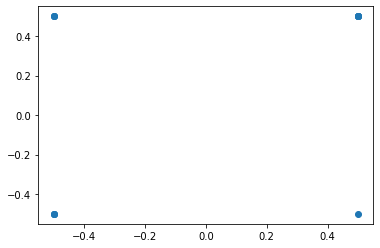

In [20]:
import matplotlib.pyplot as plt
plt.plot(ok[n][0],ok[n][1], 'o')